# CS 524 - Homework 7

## Question 1a


$$
v =
\begin{bmatrix}
x \\
y \\
z \\
\end{bmatrix} \quad
Q =
\begin{bmatrix}
2 & 4 & -3 \\
4 & 2 & -3 \\
-3 & -3 & 9 \\
\end{bmatrix}
$$

## Question 1b

In [117]:
using LinearAlgebra

Q = [2 4 -3; 4 2 -3; -3 -3 9]
(L, U) = eigen(Q)
L

3-element Vector{Float64}:
 -1.9999999999999996
  3.000000000000001
 12.0

We know that the eigenvalues are -2, 3, and 12.
Ellipsoids have to be definite with positive eigenvalues.
Since one eigenvalue is strictly negative, we know that this is not an ellipsoid.
Q is indefinite.

## Question 1c

$$
Q = U
\begin{bmatrix}
-2 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 12 \\
\end{bmatrix}
U^T \\
$$

we then split it to get:
$$
Q = U
\begin{bmatrix}
0 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 12 \\
\end{bmatrix}
U^T - U
\begin{bmatrix}
\sqrt2 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
U^T
$$

now we have two positive semidefinite matrices so we can use the matrix square root
we have $Q = U\Lambda U^T$ and $Q^{1/2} = U\Lambda^{1/2}U^T$

$$
Q = U
\begin{bmatrix}
0 & 0 & 0 \\
0 & \sqrt3 & 0 \\
0 & 0 & \sqrt12 \\
\end{bmatrix}
U^T - U
\begin{bmatrix}
\sqrt2 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
U^T
$$

thus we have:
$$
A = U
\begin{bmatrix}
0 & 0 & 0 \\
0 & \sqrt3 & 0 \\
0 & 0 & \sqrt12 \\
\end{bmatrix}
U^T \quad
B = U
\begin{bmatrix}
\sqrt2 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
U^T \quad
v =
\begin{bmatrix}
x \\
y \\
z \\
\end{bmatrix}
$$

## Question 1d

let $(x', y', z')$ be an arbitrary direction
let $\lambda$ be the magnitude of the above vector

we want to derive a way to find $x, y, z$ such that the objective function is unbounded while satisfying the constraint

let $v = \lambda(x', y', z')$ which we then substitute into the constraint (standard form):

$$v^TQv = \lambda(x', y', z')^TQ\lambda(x', y', z') \leq 1$$
$$\lambda^2(x', y', z')^TQ(x', y', z') \leq 1$$
$$(x', y', z')^TQ(x', y', z') \leq \frac{1}{\lambda^2}$$

since we want to find an infinitely large magnitude we get the following:

$$2x^2 + 2y^2 + 9z^2 + 8xy - 6xz - 6yz \leq 0$$

This inequality will tell us the which direction will give an unbounded solution.
By choosing an arbitrary x and y, we can calculate the value of z to yield the vector while holding the constraint.

## Question 2

first we define the optimization problem
we want to minimize the circle while still ensuring it covers as many points as possible

$$ \text{minimize} \quad R$$
$$ \text{subject to: }(X_i - x_{center})^2 + (Y_i - y_{center})^2 \leq R \quad \text{for } i = 1, ..., 50$$

R is the radius of the circle
$x_{center}$ is the x-coordinate of the center of the circle
$y_{center}$ is the y-coordinate of the center of the circle
$X_i$ is the x-coordinate of the point
$Y_i$ is the y-coordinate of the point
$i$ is the point; till 50

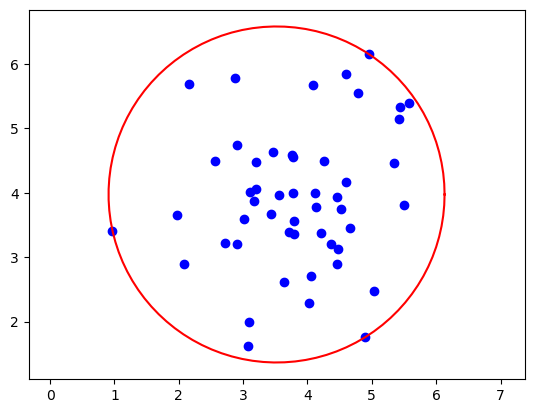

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14


(0.6485035555857815, 6.391509291746406, 1.1025806081141465, 6.846309320768463)

In [119]:
using PyPlot
using JuMP, Gurobi

X = 4 .+ randn(2,50)

m_circle = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))

@variable(m_circle, x_center)
@variable(m_circle, y_center)
@variable(m_circle, R)

for i in 1:50
    @constraint(m_circle, (X[1,i]-x_center)^2 + (X[2,i]-y_center)^2 <= R)
end

@objective(m_circle, Min, R)

optimize!(m_circle)

x = value(x_center)
y = value(y_center)
r = sqrt(value(R))
t = range(0,stop=2pi,length=100)

plot( x .+ r*cos.(t), y .+ r*sin.(t), color="red") # plot circle radius r with center (x1,x2)
scatter( X[1,:], X[2,:], color="blue") # plot the 50 points
axis("equal")

## Question 3a

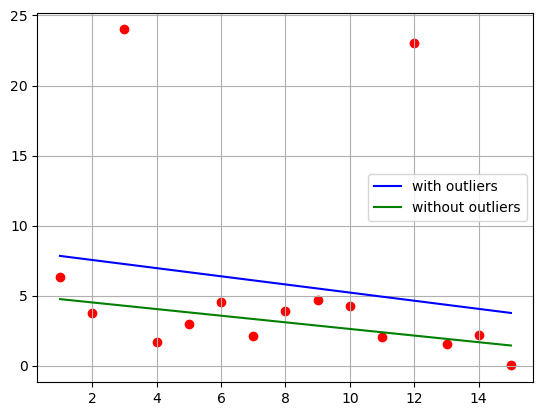

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
value of a (w/ outliers): -0.29078571428551947
value of b (w/ outliers): 8.130285714279665

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
value of a (w/o outliers): -0.23648422408233874
value of b (w/o outliers): 4.9916033483557305



In [129]:
using JuMP, Gurobi, PyPlot

# data w/ outliers
x = 1:15
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

# model w/ outliers
m_outliers = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))
@variable(m_outliers, a1)
@variable(m_outliers, b1)
@objective(m_outliers, Min, sum((y[i] - a1*x[i] - b1)^2 for i in 1:15))
optimize!(m_outliers)
a1 = value(a1)
b1 = value(b1)
println("value of a (w/ outliers): ", a1)
println("value of b (w/ outliers): ", b1)
println()

# data w/o outliers
non_outliers = [1:2; 4:11; 13:15]

# model w/o outliers
m_no_outliers = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))
@variable(m_no_outliers, a2)
@variable(m_no_outliers, b2)
@objective(m_no_outliers, Min, sum((y[i] - a2*x[i] - b2)^2 for i in non_outliers))
optimize!(m_no_outliers)
a2 = value(a2)
b2 = value(b2)
println("value of a (w/o outliers): ", a2)
println("value of b (w/o outliers): ", b2)
println()

# scatter plot
scatter(x, y, color="red")
plot(x, a1*x .+ b1, color="blue", label="with outliers")
plot(x, a2*x .+ b2, color="green", label="without outliers")
legend()
grid()

__EXPLANATION__: we see that w/ outliers (blue) the line is higher than w/o outliers (green) this is because the outliers affect it

## Question 3b

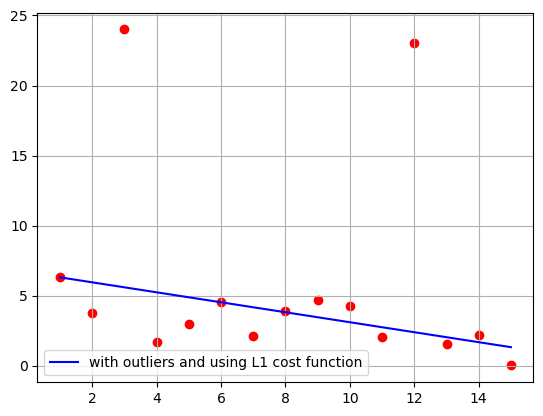

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14


In [121]:
# model using L1 cost function
# have to use epigraph trick to convert into a linear program
m_l1 = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))
@variable(m_l1, a)
@variable(m_l1, b)
@variable(m_l1, t[1:15])
for i in 1:15
    @constraint(m_l1, y[i] - a*x[i] - b <= t[i])
    @constraint(m_l1, y[i] - a*x[i] - b >= -t[i])
end
@objective(m_l1, Min, sum(t))
optimize!(m_l1)
a = value(a)
b = value(b)

# scatter plot
scatter(x, y, color="red")
plot(x, a*x .+ b, color="blue", label="with outliers and using L1 cost function")
legend()
grid()

In [122]:
# evidence L1 cost function is better than L2 cost function
# lets analyze the errors of both cost functions
err1 = 0
err2 = 0
for i in non_outliers
    err1 = err1 + (y[i] - a*x[i] - b)^2
    err2 = err2 + (y[i] - a1*x[i] - b1)^2
end
println("err1: ", err1)
println("err2: ", err2)

err1: 30.457700000000003
err2: 115.98970497417054


__EXPLANATION:__ we see that the errors in L2 are higher than that in L1 so L1 cost function is better than L2 cost function

## Question 3c

In [123]:
# model the convex QP
M = 1
X = range(-3, 3, 100)
results = []

for i in X
    m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))
    @variable(m, v >= 0)
    @variable(m, w <= M)
    @objective(m, Min, w^2 + 2*M*v)
    @constraint(m, i <= w + v)  # again using epigraph trick
    @constraint(m, -i <= w + v)  # again using epigraph trick
    optimize!(m)
    push!(results, objective_value(m))
end

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14

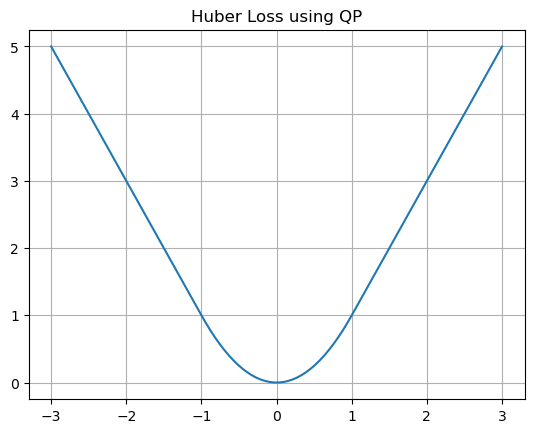

In [124]:
plot(X, results)
title("Huber Loss using QP")
grid()

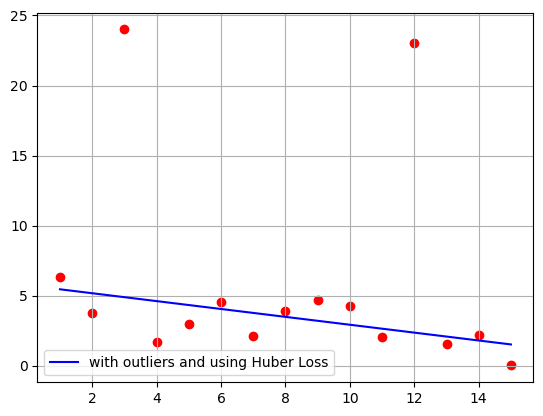

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14

value of a (using Huber Loss): -0.2811079944855354
value of b (using Huber Loss): 5.738120618284127


In [128]:
# model using Huber Loss
m_huber = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))
@variable(m_huber, a_huber)
@variable(m_huber, b_huber)
@variable(m_huber, v[1:15] >= 0)
@variable(m_huber, w[1:15] <= M)
for i in 1:15
    @constraint(m_huber, y[i] - a_huber*x[i] - b_huber <= w[i] + v[i])  # again using epigraph trick
    @constraint(m_huber, y[i] - a_huber*x[i] - b_huber >= -w[i] - v[i])  # again using epigraph trick
end
@objective(m_huber, Min, sum(w[i]^2 + 2*M*v[i] for i in 1:15))
optimize!(m_huber)
a_huber = value(a_huber)
b_huber = value(b_huber)

println()
println("value of a (using Huber Loss): ", a_huber)
println("value of b (using Huber Loss): ", b_huber)

scatter(x, y, color="red")
plot(x, a_huber*x .+ b_huber, color="blue", label="with outliers and using Huber Loss")
legend()
grid()